# Kaggle - Shelter Animal Outcomes_1

In [47]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

## Load Dataset

In [48]:
train = pd.read_csv("data/train.csv")

print(train.shape)

train.head()

(26729, 10)


,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [49]:
test = pd.read_csv("data/test.csv")

print(test.shape)

test.head()

(11456, 8)


,ID,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,1,Summer,2015-10-12 12:15:00,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White
1,2,Cheyenne,2014-07-26 17:59:00,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan
2,3,Gus,2016-01-13 12:20:00,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby
3,4,Pongo,2013-12-28 18:12:00,Dog,Intact Male,4 months,Collie Smooth Mix,Tricolor
4,5,Skooter,2015-09-24 17:59:00,Dog,Neutered Male,2 years,Miniature Poodle Mix,White


## EDA and Visualization

### 1. Dates

In [50]:
train["DateTime"] = pd.to_datetime(train["DateTime"])

train["DateTime-year"] = train["DateTime"].dt.year
train["DateTime-month"] = train["DateTime"].dt.month
train["DateTime-day"] = train["DateTime"].dt.day
train["DateTime-hour"] = train["DateTime"].dt.hour
train["DateTime-minute"] = train["DateTime"].dt.minute
train["DateTime-second"] = train["DateTime"].dt.second
train["DateTime-dayofweek"] = train["DateTime"].dt.dayofweek

print(train.shape)

train[["DateTime", "DateTime-year", "DateTime-month", "DateTime-day", "DateTime-hour", "DateTime-minute", "DateTime-second", "DateTime-dayofweek"]].head()

(26729, 17)


,DateTime,DateTime-year,DateTime-month,DateTime-day,DateTime-hour,DateTime-minute,DateTime-second,DateTime-dayofweek
0,2014-02-12 18:22:00,2014,2,12,18,22,0,2
1,2013-10-13 12:44:00,2013,10,13,12,44,0,6
2,2015-01-31 12:28:00,2015,1,31,12,28,0,5
3,2014-07-11 19:09:00,2014,7,11,19,9,0,4
4,2013-11-15 12:52:00,2013,11,15,12,52,0,4


### 1-1) 시각화를 하기 전 예상

1. 일단 분(```Dates-minute```), 초(```Dates-second```)는 동물 상태를 판가름하는데 별 영향이 없을 것 같음.
2. 1년에 31일이 있는 달이 절반 정도 밖에 되지 않기 때문에 31일 데이터가 적게 나올것 같음.
3. 반면 시간(```Dates-hour```)은 동물 상태를 판별하는데 큰 영향이 있을 것 같음.

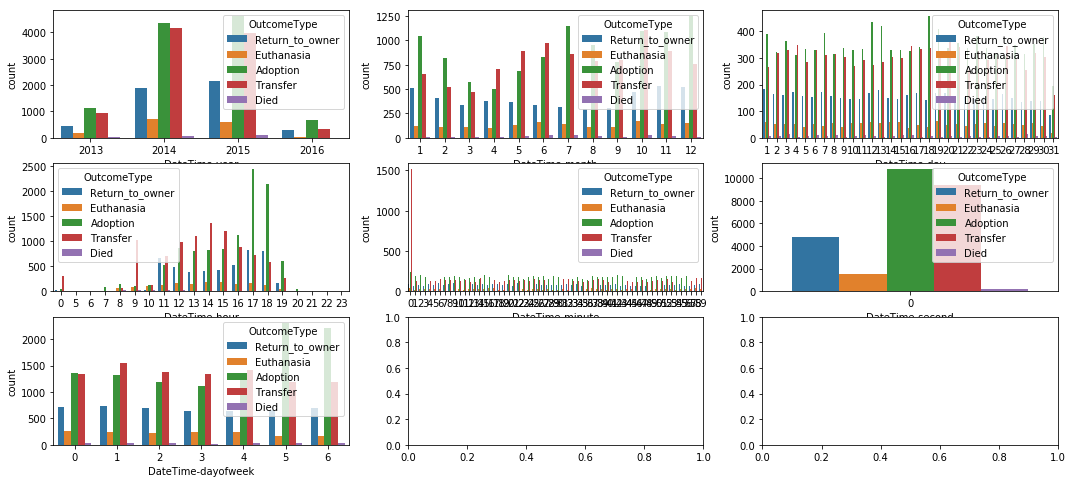

In [51]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(nrows=3, ncols=3)

figure.set_size_inches(18, 8)

sns.countplot(data=train, x="DateTime-year", hue="OutcomeType", ax=ax1)
sns.countplot(data=train, x="DateTime-month",hue="OutcomeType",  ax=ax2)
sns.countplot(data=train, x="DateTime-day",hue="OutcomeType",  ax=ax3)
sns.countplot(data=train, x="DateTime-hour",hue="OutcomeType",  ax=ax4)
sns.countplot(data=train, x="DateTime-minute",hue="OutcomeType",  ax=ax5)
sns.countplot(data=train, x="DateTime-second",hue="OutcomeType",  ax=ax6)
sns.countplot(data=train, x="DateTime-dayofweek",hue="OutcomeType",  ax=ax7)

### 1-2) 이 시각화로 발견할 수 있는 사실

1. 초(```Dates-second```)는 전부 0으로 기록되어 있어 의미 있는 데이터가 아님. 분(```Dates-minute```)은 0분이 상당히 높다는 것을 알 수 있음.

2. 일(```Dates-day```) 31일을 제외 하면 크게 특징을 보이는 부분이 없음.

3. 시간(```Dates-hour```)을 확인해 보면 세벽시간과 아침시간에는 거의 없으며, 오후시간 혹은 퇴근 시간이 되면서 늘어남.

### 1-3) 예측 모델 계선 가능성

1. 초(```Dates-second```)는 전부 다 0으로 feature 에 포함 시키지 않아도 될것 같음.
2. 시간(```Dates-hour```) 데이터는 예측하는데 도움이 많이 될것 같음.
3. 31일이 있는 달이 1년의 절반 밖에 되지 않기 때문에 이를 참고 하여 학습을 시켜야 할것 같음.

### 2. Breed

### 2-1) 시각화를 하기 전 예상

1. 품종에 따라 사람들이 선호 하는 종이 있을 것임.
2. 많이 변화가 있는 품종이 있을것이며 거의 없는 품종이 있을 것임.

In [52]:
train["Breed"].value_counts()

Domestic Shorthair Mix                            8810
Pit Bull Mix                                      1906
Chihuahua Shorthair Mix                           1766
Labrador Retriever Mix                            1363
Domestic Medium Hair Mix                           839
German Shepherd Mix                                575
Domestic Longhair Mix                              520
Siamese Mix                                        389
Australian Cattle Dog Mix                          367
Dachshund Mix                                      318
Boxer Mix                                          245
Miniature Poodle Mix                               233
Border Collie Mix                                  229
Australian Shepherd Mix                            163
Rat Terrier Mix                                    157
Catahoula Mix                                      157
Jack Russell Terrier Mix                           146
Yorkshire Terrier Mix                              143
Domestic S

In [53]:
Breed_list = train["Breed"].value_counts().index

Breed_list

Index(['Domestic Shorthair Mix', 'Pit Bull Mix', 'Chihuahua Shorthair Mix',
       'Labrador Retriever Mix', 'Domestic Medium Hair Mix',
       'German Shepherd Mix', 'Domestic Longhair Mix', 'Siamese Mix',
       'Australian Cattle Dog Mix', 'Dachshund Mix',
       ...
       'Shetland Sheepdog/Cardigan Welsh Corgi', 'Beagle/Cocker Spaniel',
       'Siberian Husky/Catahoula', 'Chow Chow/Siberian Husky',
       'Golden Retriever/Australian Shepherd',
       'Australian Kelpie/Chinese Sharpei', 'Collie Smooth/Siberian Husky',
       'Domestic Longhair/Russian Blue', 'Shih Tzu/Cardigan Welsh Corgi',
       'Silky Terrier/Yorkshire Terrier'],
      dtype='object', length=1380)

In [54]:
train["Breed(clean)"] = train["Breed"]


train[["Breed", "Breed(clean)"]].head()

,Breed,Breed(clean)
0,Shetland Sheepdog Mix,Shetland Sheepdog Mix
1,Domestic Shorthair Mix,Domestic Shorthair Mix
2,Pit Bull Mix,Pit Bull Mix
3,Domestic Shorthair Mix,Domestic Shorthair Mix
4,Lhasa Apso/Miniature Poodle,Lhasa Apso/Miniature Poodle


In [55]:
Breed_counts = train["Breed(clean)"].value_counts()

Breed_counts

Domestic Shorthair Mix                            8810
Pit Bull Mix                                      1906
Chihuahua Shorthair Mix                           1766
Labrador Retriever Mix                            1363
Domestic Medium Hair Mix                           839
German Shepherd Mix                                575
Domestic Longhair Mix                              520
Siamese Mix                                        389
Australian Cattle Dog Mix                          367
Dachshund Mix                                      318
Boxer Mix                                          245
Miniature Poodle Mix                               233
Border Collie Mix                                  229
Australian Shepherd Mix                            163
Rat Terrier Mix                                    157
Catahoula Mix                                      157
Jack Russell Terrier Mix                           146
Yorkshire Terrier Mix                              143
Domestic S

In [56]:
# 100개 이상의 주소만 출력
top_Breed_counts = Breed_counts[Breed_counts >= 25]
top_Breed_counts = top_Breed_counts.index

print(len(top_Breed_counts.shape))
top_Breed_counts

1


Index(['Domestic Shorthair Mix', 'Pit Bull Mix', 'Chihuahua Shorthair Mix',
       'Labrador Retriever Mix', 'Domestic Medium Hair Mix',
       'German Shepherd Mix', 'Domestic Longhair Mix', 'Siamese Mix',
       'Australian Cattle Dog Mix', 'Dachshund Mix', 'Boxer Mix',
       'Miniature Poodle Mix', 'Border Collie Mix', 'Australian Shepherd Mix',
       'Rat Terrier Mix', 'Catahoula Mix', 'Jack Russell Terrier Mix',
       'Yorkshire Terrier Mix', 'Domestic Shorthair', 'Chihuahua Longhair Mix',
       'Siberian Husky Mix', 'Miniature Schnauzer Mix', 'Beagle Mix',
       'Rottweiler Mix', 'American Bulldog Mix', 'Cairn Terrier Mix',
       'Shih Tzu Mix', 'Chihuahua Shorthair/Dachshund',
       'Australian Kelpie Mix', 'Staffordshire Mix', 'Pointer Mix',
       'American Staffordshire Terrier Mix', 'Great Pyrenees Mix',
       'Chihuahua Shorthair', 'Labrador Retriever/Pit Bull', 'German Shepherd',
       'Anatol Shepherd Mix', 'Snowshoe Mix', 'Plott Hound Mix',
       'Labrador Retr

In [57]:
train.loc[~train["Breed(clean)"].isin(top_Breed_counts), "Breed(clean)"] = "Others"

print(train.shape)
train[["Breed", "Breed(clean)"]].head()

(26729, 18)


,Breed,Breed(clean)
0,Shetland Sheepdog Mix,Others
1,Domestic Shorthair Mix,Domestic Shorthair Mix
2,Pit Bull Mix,Pit Bull Mix
3,Domestic Shorthair Mix,Domestic Shorthair Mix
4,Lhasa Apso/Miniature Poodle,Others


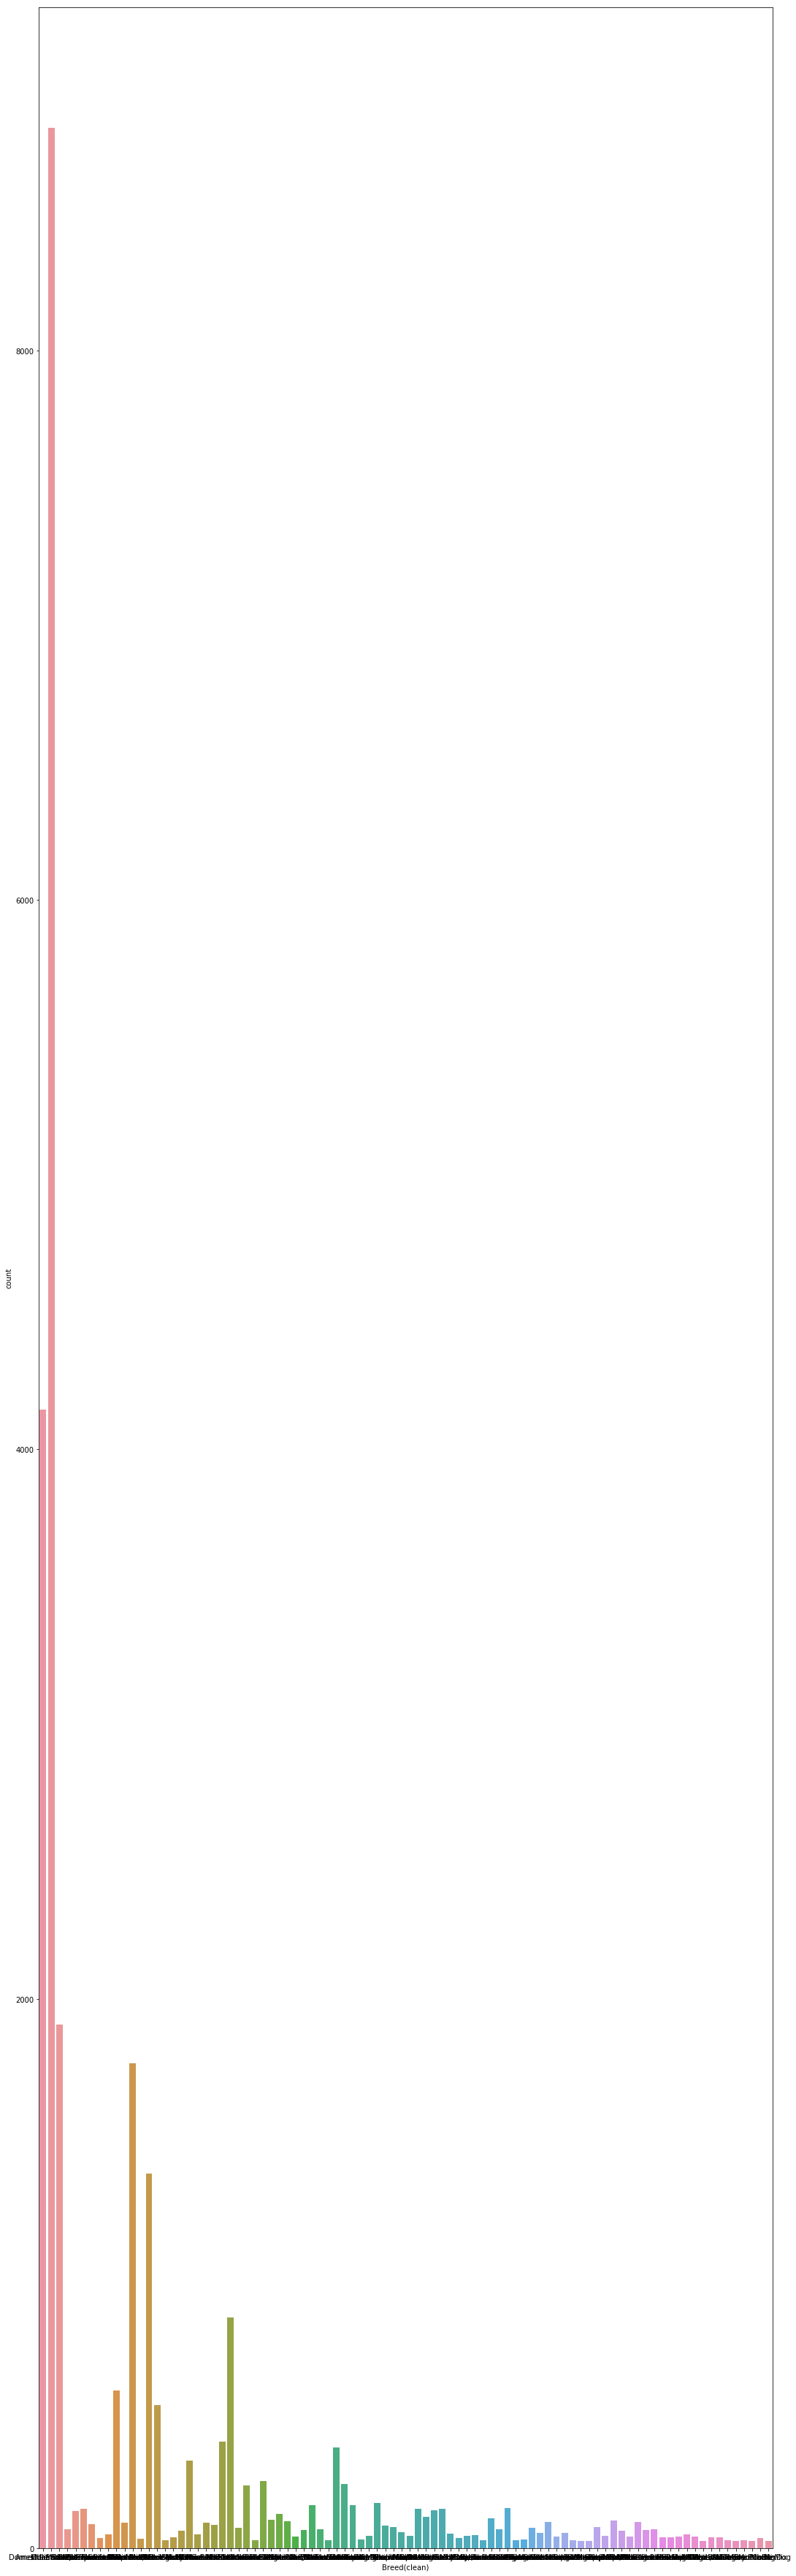

In [58]:
plt.figure(figsize = (18, 64))

sns.countplot(data=train, x="Breed(clean)")

### 2-2) 이 시각화로 발견할 수 있는 사실

1. 품종이 너무나도 다양하며 (1380 종), 1건만 있는 품종도 상당히 많다는 것을 알 수 있음 

2. 1건만 있는 품종을 아웃라이어로 잡고 다시 확인하는 것이 필요함

### 2-3) 예측 모델 계선 가능성

1. 1건만 있는 품종을 처리를 한 이후에 예측을 해야 도움이 될 것 같음.

### 3. Color

### 3-1) 시각화를 하기 전 예상

1. 색에 따라 사람들이 선호 하는 색이 있을 것임.
2. 많이 변화가 있는 색이 있을것이며 거의 없는 색이 있을 것임.

In [67]:
train["Color"].value_counts()

Black/White              2824
Black                    2292
Brown Tabby              1635
Brown Tabby/White         940
White                     931
Brown/White               884
Orange Tabby              841
Tan/White                 773
Tricolor                  752
Blue/White                702
Black/Tan                 672
White/Black               643
Brown                     639
Tan                       628
White/Brown               569
Tortie                    530
Calico                    517
Orange Tabby/White        455
Brown Brindle/White       450
Blue                      450
Black/Brown               436
Blue Tabby                433
White/Tan                 389
Red                       337
Torbie                    335
Brown/Black               333
Red/White                 331
Blue Tabby/White          241
Brown Brindle             232
Chocolate/White           224
                         ... 
Blue/Yellow Brindle         1
Lynx Point/Gray Tabby       1
Blue/Torti

In [68]:
train["Color(clean)"] = train["Color"]


train[["Color", "Color(clean)"]].head()

,Color,Color(clean)
0,Brown/White,Brown/White
1,Cream Tabby,Cream Tabby
2,Blue/White,Blue/White
3,Blue Cream,Blue Cream
4,Tan,Tan


In [76]:
Color_lists = train["Color(clean)"].value_counts()

Color_lists

Black/White              2824
Black                    2292
Brown Tabby              1635
Brown Tabby/White         940
White                     931
Brown/White               884
Orange Tabby              841
Tan/White                 773
Tricolor                  752
Blue/White                702
Black/Tan                 672
White/Black               643
Brown                     639
Tan                       628
White/Brown               569
Tortie                    530
Calico                    517
Orange Tabby/White        455
Brown Brindle/White       450
Blue                      450
Black/Brown               436
Blue Tabby                433
White/Tan                 389
Red                       337
Torbie                    335
Brown/Black               333
Red/White                 331
Blue Tabby/White          241
Brown Brindle             232
Chocolate/White           224
                         ... 
Blue/Yellow Brindle         1
Lynx Point/Gray Tabby       1
Blue/Torti

In [84]:
top_Color_lists = Color_lists[Color_lists >= 26]
top_Color_lists = top_Color_lists.index

print(top_Color_lists.shape)

top_Color_lists

(86,)


Index(['Black/White', 'Black', 'Brown Tabby', 'Brown Tabby/White', 'White',
       'Brown/White', 'Orange Tabby', 'Tan/White', 'Tricolor', 'Blue/White',
       'Black/Tan', 'White/Black', 'Brown', 'Tan', 'White/Brown', 'Tortie',
       'Calico', 'Orange Tabby/White', 'Brown Brindle/White', 'Blue',
       'Black/Brown', 'Blue Tabby', 'White/Tan', 'Red', 'Torbie',
       'Brown/Black', 'Red/White', 'Blue Tabby/White', 'Brown Brindle',
       'Chocolate/White', 'Buff', 'Cream Tabby', 'Sable', 'Yellow',
       'Tan/Black', 'Lynx Point', 'Cream', 'Chocolate', 'Seal Point',
       'White/Blue', 'White/Brown Brindle', 'Fawn/White', 'White/Brown Tabby',
       'Gray/White', 'Gray', 'Sable/White', 'Flame Point', 'Cream Tabby/White',
       'Blue Merle', 'Black Brindle/White', 'Fawn', 'Chocolate/Tan',
       'Red/Black', 'Torbie/White', 'White/Red', 'White/Gray',
       'White/Orange Tabby', 'Gold', 'Brown/Tan', 'White/Tricolor',
       'Black Smoke', 'Black/Brown Brindle', 'Blue Merle/White',
 

In [85]:
train.loc[~train["Color(clean)"].isin(top_Color_lists), "Color(clean)"] = "Others"

print(train.shape)
train[["Color", "Color(clean)"]].head()

(26729, 19)


,Color,Color(clean)
0,Brown/White,Brown/White
1,Cream Tabby,Cream Tabby
2,Blue/White,Blue/White
3,Blue Cream,Others
4,Tan,Tan


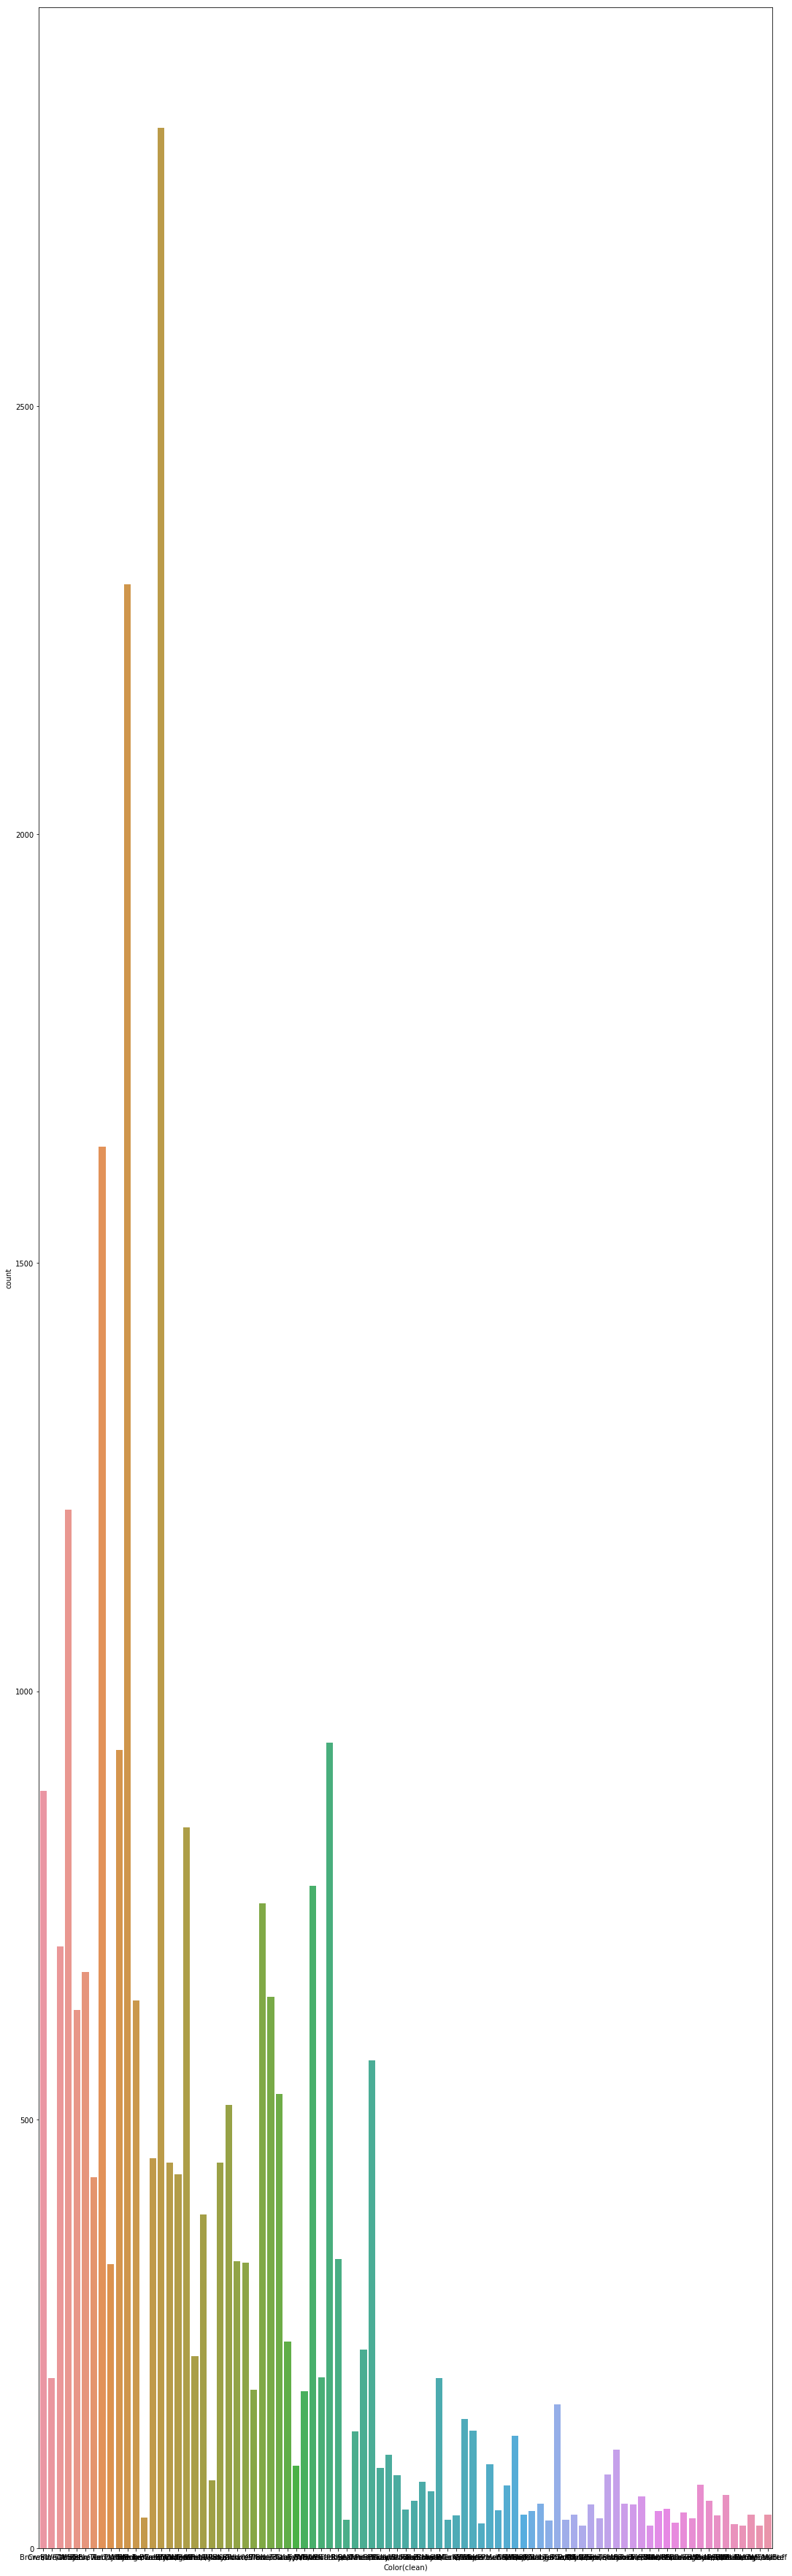

In [87]:
plt.figure(figsize = (18, 64))

sns.countplot(data=train, x="Color(clean)")

### 3-2) 이 시각화로 발견할 수 있는 사실

1. 색이 다양하며 (366 종), 1건만 있는 색상도 상당히 많다는 것을 알 수 있음 

2. 1건만 있는 색상을 아웃라이어로 잡고 다시 확인하는 것이 필요함

### 3-3) 예측 모델 계선 가능성

1. 1건만 있는 색상을 처리를 한 이후에 예측을 해야 도움이 될 것 같음.